# Setup

## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import SimpleGeluEmbed

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(SimpleGeluEmbed)

# Import the required utils
from utils.setuputil import setup_config, display_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.SimpleGeluEmbed import SimpleGeluEmbedAvg

## Config Setup

In [2]:
# Define the input configuration for the simple model
input_config = {
    # Environment and Model Info
    "env": "gcp",                
    "approach": "simple",         
    "model_name": "SimpleGeluEmbedAvg",
    
    # System Configuration
    "device": "cuda:0",
    "threads": 14,
    "seed": 42,
    
    # Data Configuration
    "data_dir": "../../data/farzan",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch": 40,
    "lr": 1e-1,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 10,
    "save_dir": '../models/'
}

# Setup the configuration using setuputil and display it
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# Training parameters
batch_size = config["batch"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]


Getting Vocab: 100%|███████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 13.90it/s]


40(P) = 40(G) + 0(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|█████████████████████████████████████████████████████████████| 5597/5597 [00:00<00:00, 74436.14it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|███████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 143.01it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 6252.69it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 6415.27it/s]



5(P) = 5(G) + 0(E)

Configuration for SIMPLE approach:
{
  "env": "gcp",
  "approach": "simple",
  "model_base": "glove50",
  "model_name": "SimpleGeluEmbedAvg",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "DEVICE": "cuda:0",
  "THREADS": 14,
  "seed": 42,
  "data_ds": "manual",
  "data_dir": "../../data/farzan",
  "train_dir": "../../data/farzan/manual_train",
  "val_dir": "../../data/farzan/manual_val",
  "test_dir": "../../data/farzan/manual_test",
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "vocab": "<Vocab Object>",
  "wvs": "<Embedding Matrix>",
  "train_loader": "<LoaderSimple Object>",
  "val_loader": "<LoaderSimple Object>",
  "test_loader": "<LoaderSimple Object>",
  "batch": 40,
  "lr": 0.1,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "save_int": 10,
  "save_dir": "../models/",
  "save_name": "gsim42_SimpleGeluEmbedAvg_manual_100x100x32_bSp5k_bsz40lr1e-1ep20pa2"
}


In [10]:
# Get the first item from train_loader
first_item = train_loader[0]

# Get the components
x_tok = first_item['x_tok']
x_masks = first_item['x_masks']
y_tok = first_item['y_tok']
filepath = first_item['file_paths']

print(f"File: {filepath}\n")

print("Shapes:")
print(f"x_tok: {x_tok.shape}")  # Should be 32-length vector
print(f"y_tok: {y_tok.shape}")  # Should be 32-length vector
print(f"x_masks: {x_masks.shape if isinstance(x_masks, torch.Tensor) else len(x_masks)}\n")

# Extract cell location [10,10]
x_cell = x_tok[10,10,:]  
y_cell = y_tok[10,10,:]

print("Values at position [10,10]:")
print(f"\nx_tok: {x_cell.tolist()}")
print(f"\nx_tok decoded: {[spreadsheet_vocab.decode(idx) for idx in x_cell.tolist()]}")
print(f"\ny_tok: {y_cell.tolist()}")



# Get the first item from train_loader
first_item = val_loader[0]

# Get the components
x_tok = first_item['x_tok']
x_masks = first_item['x_masks']
y_tok = first_item['y_tok']
filepath = first_item['file_paths']

print(f"File: {filepath}\n")

print("Shapes:")
print(f"x_tok: {x_tok.shape}")  # Should be 32-length vector
print(f"y_tok: {y_tok.shape}")  # Should be 32-length vector
print(f"x_masks: {x_masks.shape if isinstance(x_masks, torch.Tensor) else len(x_masks)}\n")

# Extract cell location [10,10]
x_cell = x_tok[10,10,:]  
y_cell = y_tok[10,10,:]

print("Values at position [10,10]:")
print(f"\nx_tok: {x_cell.tolist()}")
print(f"\nx_tok decoded: {[spreadsheet_vocab.decode(idx) for idx in x_cell.tolist()]}")
print(f"\ny_tok: {y_cell.tolist()}")

File: ../../data/farzan/manual_train/Harassment-Bullying-on-basis-of-race_reported.xlsx

Shapes:
x_tok: torch.Size([100, 100, 32])
y_tok: torch.Size([100, 100, 17])
x_masks: torch.Size([0])

Values at position [10,10]:

x_tok: [2, 1, 187, 87, 188, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

x_tok decoded: ['[CLS]', '[UNK]', '44', '.', '9219', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']

y_tok: [6, 0, 3, 2, 2, 10, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0]
File: ../../data/farzan/manual_val/advanced-placement-mathematics-enrollment.xlsx

Shapes:
x_tok: torch.Size([100, 100, 32])
y_tok: torch.Size([100, 100, 17])
x_masks: torch.Size([0])

Values at position [10,10]:

x_tok: [2, 1, 140, 87, 113, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Model Training

## Define the model

In [3]:
# Define the untrained model and move it to the device
untrained_model = SimpleGeluEmbedAvg(spreadsheet_wvs).to(DEVICE)
print(untrained_model)

SimpleGeluEmbedAvg(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_non_linear): GELU(approximate='none')
  (_pred): Linear(in_features=50, out_features=1, bias=True)
)


## Train the Model

In [4]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader, 
    val_data=val_loader, 
    DEVICE=DEVICE, 
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config
)

Epoch 0


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


Train Loss: 1.4818493127822876, Perplexity: 1.0000148186029223
Val Loss: 1.6988940238952637, Perplexity: 1.0000169890845518


Epoch 1


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 1.7233725786209106, Perplexity: 1.0000172338742876
Val Loss: 1.270524024963379, Perplexity: 1.0000127053209615


Epoch 2


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 1.2792435884475708, Perplexity: 1.000012792517708
Val Loss: 1.2971382141113281, Perplexity: 1.0000129714662698


Epoch 3


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


Train Loss: 1.3141841888427734, Perplexity: 1.0000131419282428
Val Loss: 1.2200517654418945, Perplexity: 1.000012200592081


Epoch 4


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.2254011631011963, Perplexity: 1.0000122540867118
Val Loss: 1.2002367973327637, Perplexity: 1.000012002440002


Epoch 5


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 1.218963384628296, Perplexity: 1.0000121897081402
Val Loss: 1.1791492700576782, Perplexity: 1.0000117915622204


Epoch 6


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.185173511505127, Perplexity: 1.0000118518053471
Val Loss: 1.1353275775909424, Perplexity: 1.0000113533402246


Epoch 7


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 1.1519402265548706, Perplexity: 1.000011519468614
Val Loss: 1.140608310699463, Perplexity: 1.0000114061481566


Epoch 8


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]


Train Loss: 1.1470907926559448, Perplexity: 1.0000114709737176
Val Loss: 1.0838297605514526, Perplexity: 1.00001083835634


Epoch 9


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.10149347782135, Perplexity: 1.0000110149954429
Val Loss: 1.101728916168213, Perplexity: 1.0000110173498522

Model Saved

Epoch 10


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.1073951721191406, Perplexity: 1.0000110740130377
Val Loss: 1.0391314029693604, Perplexity: 1.0000103913680196


Epoch 11


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.0560309886932373, Perplexity: 1.0000105603656473
Val Loss: 1.0618973970413208, Perplexity: 1.000010619030352


Epoch 12


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.0674270391464233, Perplexity: 1.0000106743273618
Val Loss: 0.9983834028244019, Perplexity: 1.000009983883867


Epoch 13


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 1.018102765083313, Perplexity: 1.0000101810794777
Val Loss: 1.0231492519378662, Perplexity: 1.0000102315448613


Epoch 14


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.0280438661575317, Perplexity: 1.0000102804915054
Val Loss: 0.9614435434341431, Perplexity: 1.0000096144816533


Epoch 15


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 0.9814454317092896, Perplexity: 1.000009814502479
Val Loss: 0.9868742227554321, Perplexity: 1.0000098687909238


Epoch 16


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 0.9931885004043579, Perplexity: 1.0000099319343254
Val Loss: 0.9275395274162292, Perplexity: 1.0000092754382908


Epoch 17


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 0.9474892020225525, Perplexity: 1.000009474936907
Val Loss: 0.9526616930961609, Perplexity: 1.0000095266623092


Epoch 18


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 0.9604434370994568, Perplexity: 1.0000096044804938
Val Loss: 0.8964037299156189, Perplexity: 1.0000089640774763


Epoch 19


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]

Train Loss: 0.9165724515914917, Perplexity: 1.0000091657665213
Val Loss: 0.9202924966812134, Perplexity: 1.0000092029673138

Model Saved


TRAINING DONE at epoch 19, best epoch 18
Train Loss = 0.9604434370994568, Perplexity = 1.0000096044804938
Val Loss = 0.8964037299156189, Perplexity = 1.0000089640774763


# Evaluation

In [5]:
# Define params for evaluation
thresh = 0.91
loc = 0
cond = '>'
disp_max=True

## Single Example


Filename: ../../data/farzan/manual_train/Harassment-Bullying-on-basis-of-race_reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,22): 0.51365131139755249023
(3,1): 0.51459819078445434570
(5,18): 0.52077537775039672852
(4,5): 0.52208000421524047852
(5,3): 0.52471858263015747070
(4,11): 0.54152512550354003906
(5,4): 0.59702736139297485352
(3,3): 0.68542826175689697266
(3,2): 0.69568455219268798828
(3,23): 0.83422917127609252930
(3,21): 0.86164849996566772461
(4,9): 0.91087037324905395508
(4,15): 0.91244620084762573242
(3,24): 0.94037669897079467773
(4,3): 0.94605123996734619141
(6,1): 0.95521605014801025391
(4,13): 0.97296583652496337891
(4,7): 0.97322499752044677734
(3,17): 0.97416162490844726562
(1,1): 0.99088960886001586914
(3,19): 0.99168699979782104492

NB to B ratio: Predicted = 9924:76 | Actual = 9930:70
Accuracy: 98.98% | Precision: 28.95% | Recall: 31.43% | F1-Score: 0.30



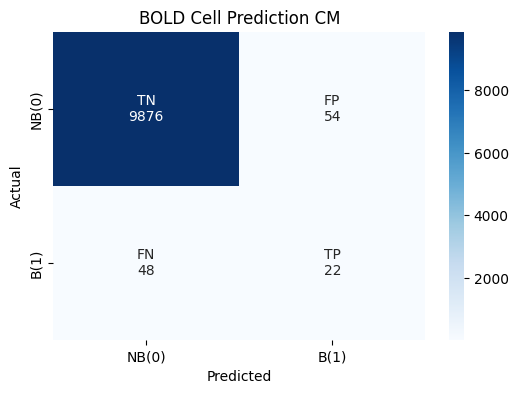


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,3,4,7,8,9,10,13,14,15,16,17,18,19,20,24
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../../data/farzan/manual_val/advanced-placement-mathematics-enrollment.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,18): 0.51365131139755249023
(3,1): 0.51459819078445434570
(4,5): 0.52208000421524047852
(5,3): 0.52471858263015747070
(4,11): 0.54152512550354003906
(5,4): 0.59702736139297485352
(3,3): 0.68542826175689697266
(3,2): 0.69568455219268798828
(3,21): 0.83422917127609252930
(3,19): 0.86164849996566772461
(4,9): 0.91087037324905395508
(4,15): 0.91244620084762573242
(3,22): 0.94037669897079467773
(4,3): 0.94605123996734619141
(4,13): 0.97296583652496337891
(4,7): 0.97322499752044677734
(3,17): 0.98322701454162597656
(1,1): 0.99397116899490356445

NB to B ratio: Predicted = 9939:61 | Actual = 9937:63
Accuracy: 99.10% | Precision: 27.87% | Recall: 26.98% | F1-Score: 0.27



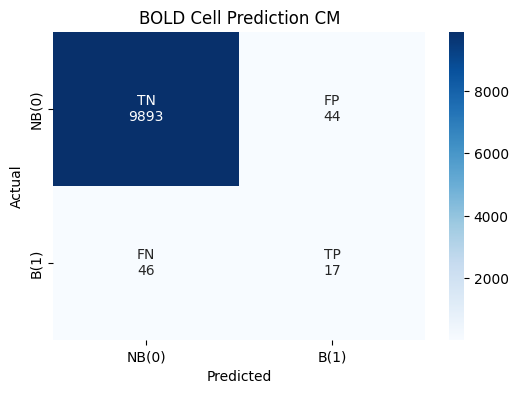


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
4,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1
60,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
61,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0



Filename: ../../data/farzan/manual_test/dlportfolio-by-school-type.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(4,10): 0.50141286849975585938
(4,6): 0.51214957237243652344
(19,0): 0.51378703117370605469
(8,1): 0.51539987325668334961
(15,0): 0.51814216375350952148
(11,0): 0.52034980058670043945
(6,0): 0.52044087648391723633
(9,1): 0.52196294069290161133
(6,1): 0.52231395244598388672
(7,0): 0.52435773611068725586
(4,2): 0.52753299474716186523
(7,1): 0.53381341695785522461
(4,8): 0.53400272130966186523
(4,4): 0.54122209548950195312
(5,0): 0.83881282806396484375
(0,0): 0.97722840309143066406
(5,3): 0.98094290494918823242
(5,2): 0.99821436405181884766
(5,4): 0.99861800670623779297

NB to B ratio: Predicted = 9978:22 | Actual = 9936:64
Accuracy: 99.58% | Precision: 100.00% | Recall: 34.38% | F1-Score: 0.51



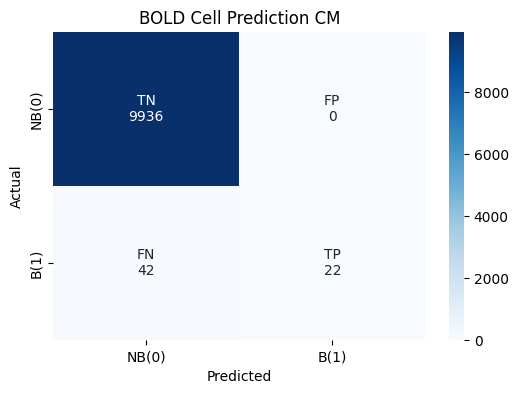


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check with single example
infer_one(trained_model, train_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, val_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, test_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)

## All Examples

Batch Inference: 100%|████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396655:3345 | Actual = 396714:3286
Accuracy: 99.98% | Precision: 98.09% | Recall: 99.85% | F1-Score: 0.99



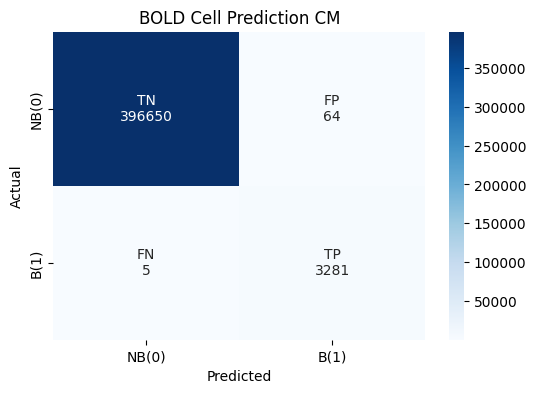

In [7]:
# Evaluate the model on all train files
infer_full(trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49594:406 | Actual = 49602:398
Accuracy: 99.98% | Precision: 98.03% | Recall: 100.00% | F1-Score: 0.99



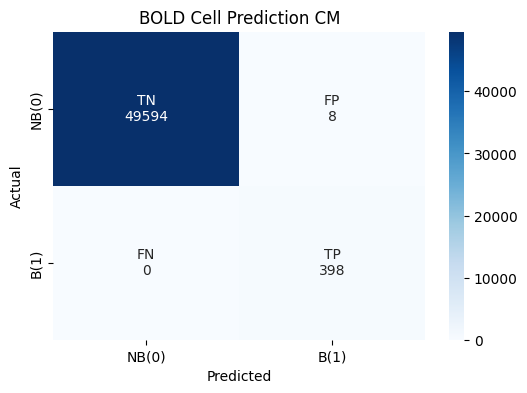

In [8]:
# All val files
infer_full(trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49614:386 | Actual = 49606:394
Accuracy: 99.94% | Precision: 97.41% | Recall: 95.43% | F1-Score: 0.96



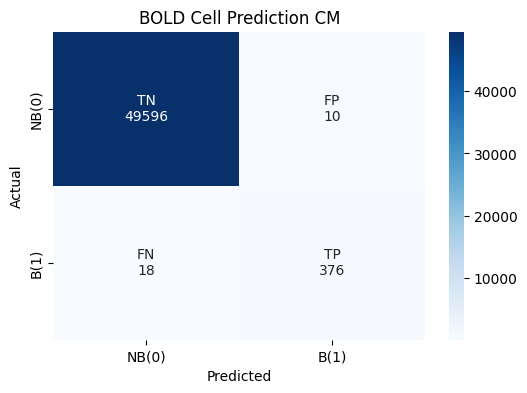

In [9]:
# All test files
infer_full(trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)